In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

import numpy as np
import matplotlib.pyplot as plt

## 设置路径

In [2]:
path_pre = '../../'
path_original_dataset = path_pre + 'original-dataset/'

## 加载数据

In [3]:
train_df = pd.read_csv(path_original_dataset + 'train.csv')

In [83]:
train_df.head(5)

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [84]:
print('样本总数: ', train_df.index.size)

样本总数:  3749528


## label

In [86]:
distribution_label = train_df['label'].value_counts().sort_index()
distribution_label

0    3656266
1      93262
Name: label, dtype: int64

In [88]:
print('正负样本比例: {0}:{1}'.format(1, int(distribution_label.loc[0] / distribution_label.loc[1])))

正负样本比例: 1:39


### 单独查看正样本的情况

In [5]:
positive = train_df.loc[train_df['label'] == 1]
positive.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
147,1,170001,181031.0,2137,703736,2579,1,1
149,1,170001,170009.0,3981,2030308,2579,2,1
190,1,170001,170010.0,3584,936876,3322,2,3
194,1,170001,181027.0,2137,2619571,2579,1,2
250,1,170001,181031.0,2137,1411484,2579,1,2


In [6]:
positive['connectionType'].value_counts()

1    87556
2     4443
3      773
4      281
0      209
Name: connectionType, dtype: int64

由此可见 1 代表的是WIFI，属于强特征，2应该是4G，3是3G，4是2G，0是未知

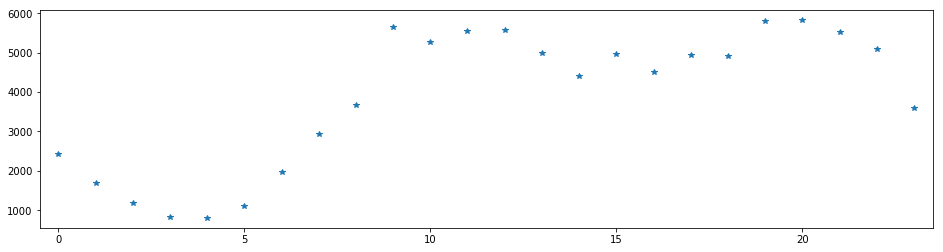

In [26]:
clickTime_hour_positive = (positive['clickTime'] / 100 % 100).astype(int)
distribution_clickTime_hour_positive = clickTime_hour_positive.value_counts()
distribution_clickTime_hour_positive.plot(figsize=(16,4), style='*')
plt.xlim([-0.5, 23.5])
plt.show()

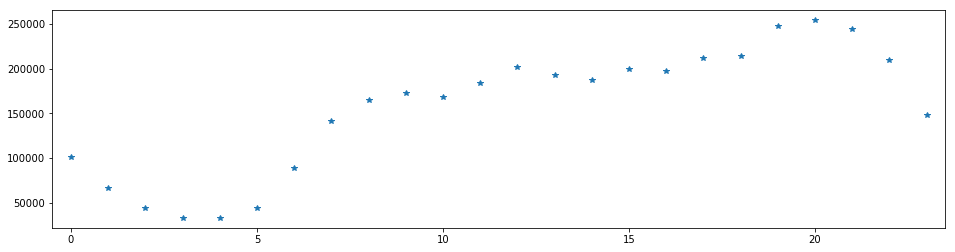

In [27]:
clickTime_hour = (train_df['clickTime'] / 100 % 100).astype(int)
distribution_clickTime_hour = clickTime_hour.value_counts()
distribution_clickTime_hour.plot(figsize=(16,4), style='*')
plt.xlim([-0.5, 23.5])
plt.show()

In [28]:
distribution_clickTime_hour_positive.head()

20    5826
19    5799
9     5643
12    5573
11    5565
Name: clickTime, dtype: int64

In [29]:
distribution_clickTime_hour.head()

20    253981
19    248044
21    244250
18    214247
17    211876
Name: clickTime, dtype: int64

#### hour 的转化率

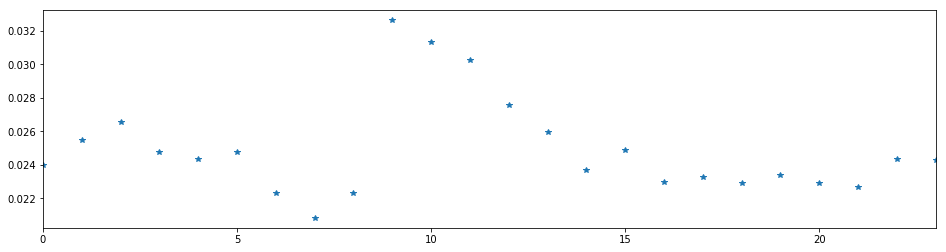

In [30]:
distribution_clickTime_hour_positive.sort_index(inplace=True)
distribution_clickTime_hour.sort_index(inplace=True)
distribution_clickTime_hour_conversion_ratio = distribution_clickTime_hour_positive / distribution_clickTime_hour
distribution_clickTime_hour_conversion_ratio.plot(figsize=(16,4), style='*')
# plt.xlim([-0.5, 23.5])
plt.show()

#### weekday 的转化率

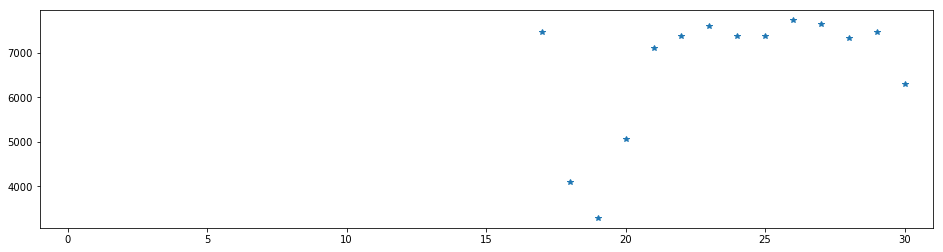

In [31]:
clickTime_day_positive = (positive['clickTime'] / 10000).astype(int)
distribution_clickTime_day_positive = clickTime_day_positive.value_counts()
distribution_clickTime_day_positive.plot(figsize=(16,4), style='*')
plt.xlim([-1, 31])
plt.show()

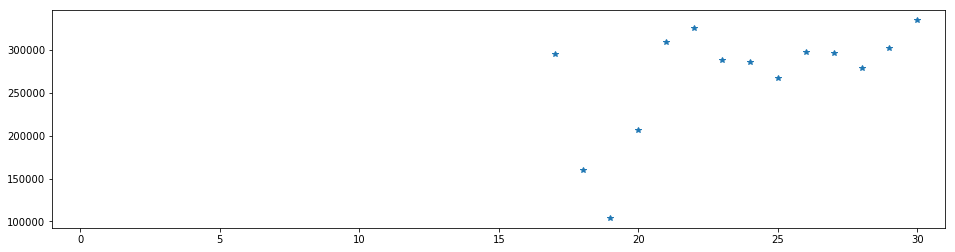

In [32]:
clickTime_day = (train_df['clickTime'] / 10000).astype(int)
distribution_clickTime_day = clickTime_day.value_counts()
distribution_clickTime_day.plot(figsize=(16,4), style='*')
plt.xlim([-1, 31])
plt.show()

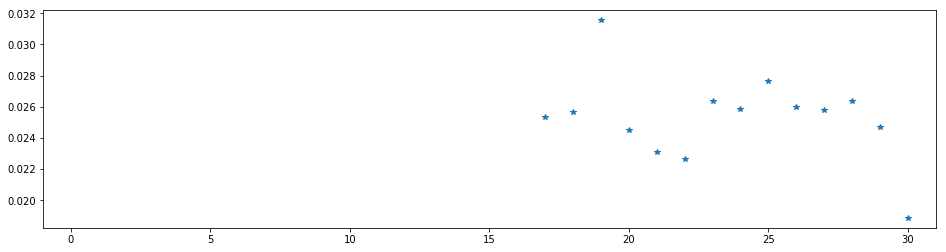

In [35]:
distribution_clickTime_day_positive.sort_index(inplace=True)
distribution_clickTime_day.sort_index(inplace=True)
distribution_clickTime_day_conversion_ratio = distribution_clickTime_day_positive / distribution_clickTime_day
distribution_clickTime_day_conversion_ratio.plot(figsize=(16,4), style='*')
plt.xlim([-1, 31])
plt.show()

可见，这个转化率不太具有参考价值

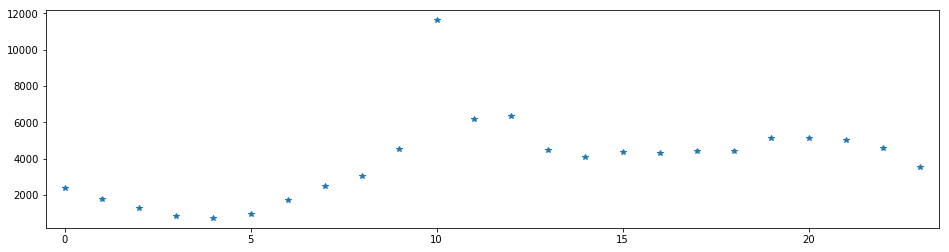

In [15]:
conversionTime_hour = (train_df['conversionTime'].dropna() / 100 % 100).astype(int)
distribution_conversionTime_hour = conversionTime_hour.value_counts()
distribution_conversionTime_hour.plot(figsize=(16,4), style='*')
plt.xlim([-0.5, 23.5])
plt.show()

### clickTime

In [8]:
distribution_clickTime = train_df['clickTime'].value_counts().sort_index()

In [9]:
distribution_clickTime.index.size

20160

In [10]:
distribution_clickTime.head()

170000    118
170001    184
170002    169
170003    186
170004    170
Name: clickTime, dtype: int64

#### click 数随日期的分布

In [11]:
clickTime_day = (train_df['clickTime'] / 10000).astype(int)

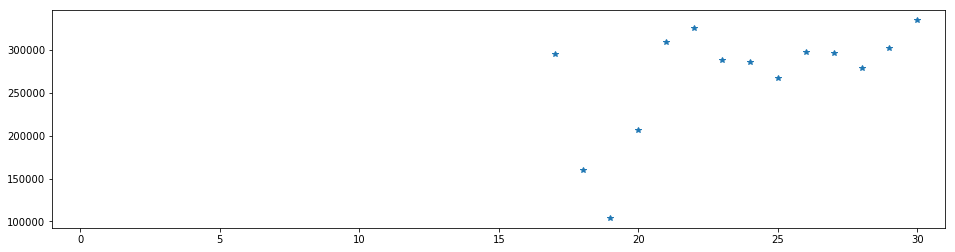

In [12]:
clickTime_day.value_counts().plot(figsize=(16,4), style='*')
plt.xlim([-1, 31])
plt.show()

对比 installTime_day
![](http://i1.piimg.com/593974/2f5cab5c20605621.png)

#### click 数随时间的分布

In [13]:
clickTime_hour = (train_df['clickTime'] / 100 % 100).astype(int)

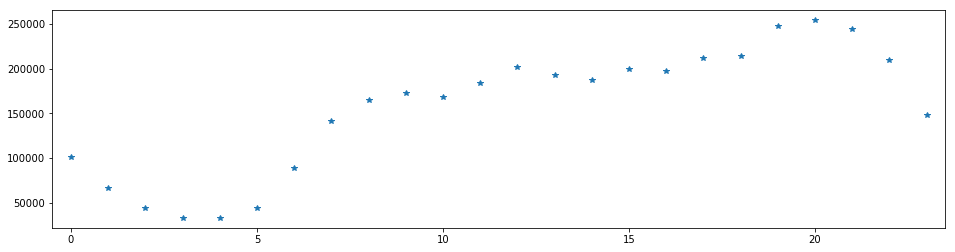

In [14]:
clickTime_hour.value_counts().plot(figsize=(16,4), style='*')
plt.xlim([-0.5, 23.5])
plt.show()

对比 installTime_hour
![](http://i1.piimg.com/593974/12de509511be02de.png)

### conversionTime

In [15]:
distribution_conversionTime = train_df['conversionTime'].value_counts().sort_index()

In [16]:
distribution_conversionTime.index.size

18206

In [17]:
distribution_conversionTime.head()

170005.0    4
170006.0    3
170007.0    2
170008.0    2
170009.0    3
Name: conversionTime, dtype: int64

#### 观察 deltaTime = conversionTime - clickTime

In [28]:
train_df['deltaTime'] = train_df['conversionTime'] - train_df['clickTime']
day = np.floor(train_df['deltaTime'] / 10000)
hour = np.floor(train_df['deltaTime'] / 100 % 100)
minute = np.floor(train_df['deltaTime'] % 100)
train_df['deltaTime_min'] = day * 24 * 60 + hour * 24 + minute

In [29]:
distribution_deltaTime = train_df['deltaTime_min'].value_counts()
distribution_deltaTime.sort_index(inplace=True)
distribution_deltaTime.head()

0.0     7198
1.0    19672
2.0     9446
3.0     4960
4.0     4020
Name: deltaTime_min, dtype: int64

In [30]:
distribution_deltaTime.tail()

6763.0    1
6774.0    1
6777.0    1
6791.0    1
6792.0    1
Name: deltaTime_min, dtype: int64

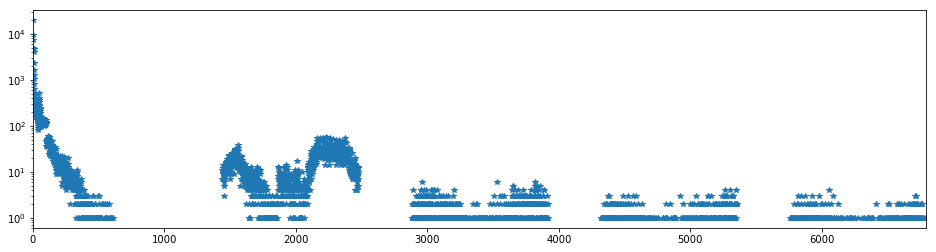

In [31]:
distribution_deltaTime.sort_index().plot(figsize=(16,4), style='*', logy=True)
plt.show()

可以据此，将训练集分为四部分，分别训练模型，然后集成。以避免最后几天的训练数据，某些label=0不够准确的情况。  
对不同的模型，选择不同时间范围内的数据。比如，一天内就完成转化的模型，可以使用整个训练集；两天内完成转化的模型，不使用最后一天的数据，等等。（注：这只是个初步的设想）    
目前来说，就直接不使用最后5天的数据

#### 观察 deltaTime 与 advertiserID 的关系

In [25]:
# 加载 ad.csv
ad_df = pd.read_csv(path_original_dataset + 'ad.csv')
ad_df.head()

,creativeID,adID,camgaignID,advertiserID,appID,appPlatform
0,4079,2318,147,80,14,2
1,4565,3593,632,3,465,1
2,3170,1593,205,54,389,1
3,6566,2390,205,54,389,1
4,5187,411,564,3,465,1


In [32]:
# 合并表格
train_merge = train_df.merge(ad_df, on='creativeID')
train_merge.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,deltaTime,deltaTime_min,adID,camgaignID,advertiserID,appID,appPlatform
0,0,170000,NaN,3089,2798058,293,1,1,NaN,NaN,1321,83,10,434,1
1,0,170001,NaN,3089,195578,3659,0,2,NaN,NaN,1321,83,10,434,1
2,0,170014,NaN,3089,1462213,3659,0,3,NaN,NaN,1321,83,10,434,1
3,0,170030,NaN,3089,1985880,5581,1,1,NaN,NaN,1321,83,10,434,1
4,0,170047,NaN,3089,2152167,5581,1,1,NaN,NaN,1321,83,10,434,1


In [51]:
train_merge['advertiserID'].min()

1

In [52]:
train_merge['advertiserID'].max()

91

In [65]:
def plot_distribution_advertiserID(begin, end):
    advertiserID = train_merge.loc[(train_merge['deltaTime_min'] >= begin) & (train_merge['deltaTime_min'] < end),\
                                 'advertiserID']
    distribution = advertiserID.value_counts()
    distribution.sort_index(inplace=True)
    distribution.plot(figsize=(16,4), style='*')
    plt.xlim([-3, 95])
    plt.show()

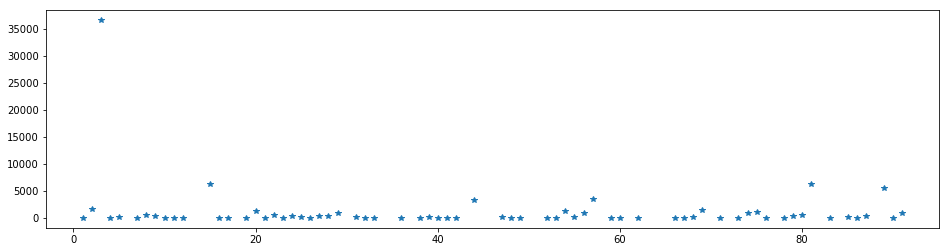

In [66]:
plot_distribution_advertiserID(0, 1000)

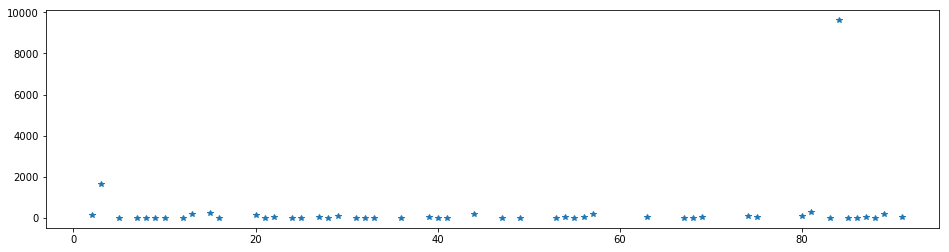

In [67]:
plot_distribution_advertiserID(1000, 2500)

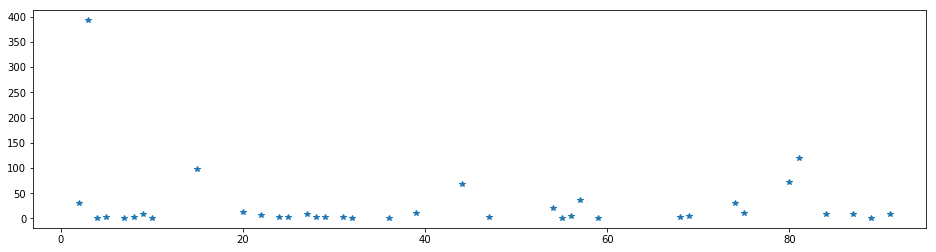

In [68]:
plot_distribution_advertiserID(2500, 4000)

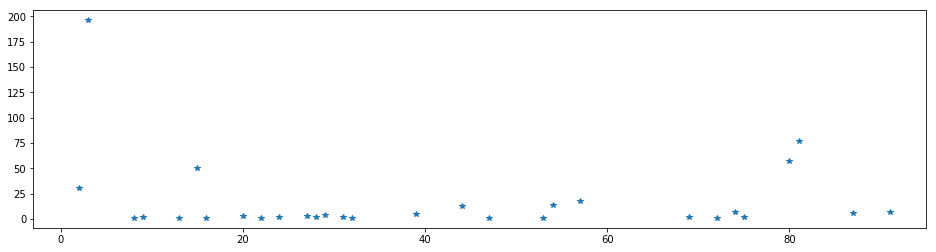

In [69]:
plot_distribution_advertiserID(4000, 5500)

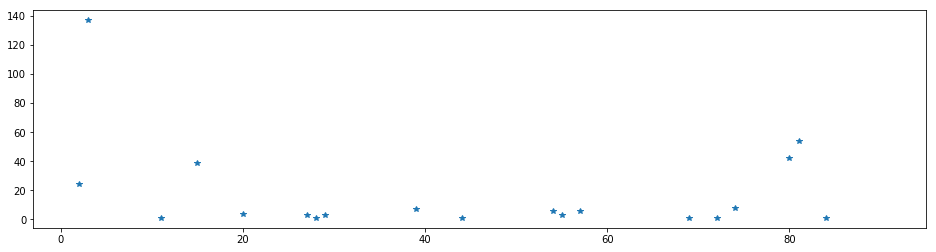

In [70]:
plot_distribution_advertiserID(5500, 7000)

由此可见，没有太明显的规律

#### 每天的行为情况

In [17]:
conversionTime_day = (train_df['conversionTime'] / 10000).dropna().astype(int)

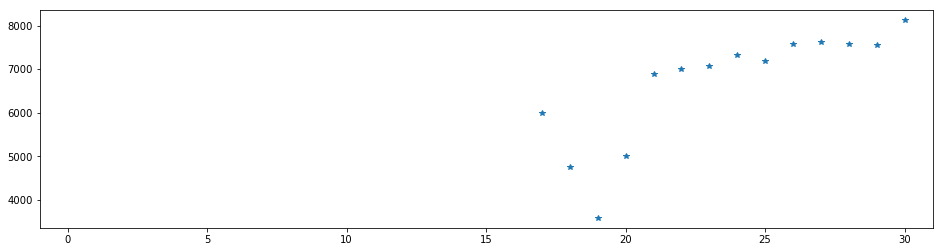

In [18]:
conversionTime_day.value_counts().plot(figsize=(16,4), style='*')
plt.xlim([-1, 31])
plt.show()

对比 installTime_hour
![](http://i1.piimg.com/593974/12de509511be02de.png)

#### 每小时的行为情况

In [19]:
conversionTime_hour = (train_df['conversionTime'] / 100 % 100).dropna().astype(int)

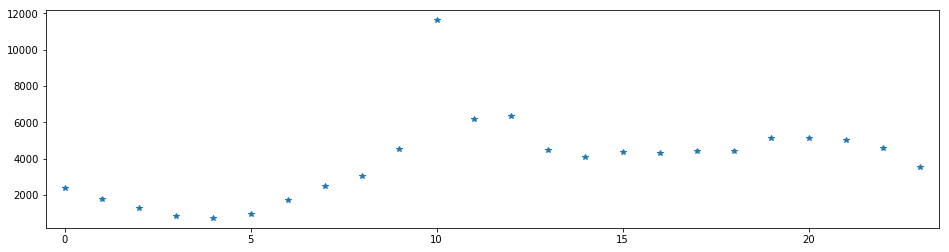

In [20]:
conversionTime_hour.value_counts().plot(figsize=(16,4), style='*')
plt.xlim([-0.5, 23.5])
plt.show()

对比 installTime_hour
![](https://lh5.googleusercontent.com/a_T-224-RNQL7-7u1q-nlivGPwAf4JDQQsfAANhRAc8eHJgDIxmN7B6v7HkkclZI8ljFivsMykaTSF8=w1327-h876-rw)

### creativeID

In [23]:
distribution_creativeID = train_df['creativeID'].value_counts().sort_index()
distribution_creativeID.head()

1     5
2     4
3    15
4     1
5     7
Name: creativeID, dtype: int64

In [24]:
distribution_creativeID.index.size

6315

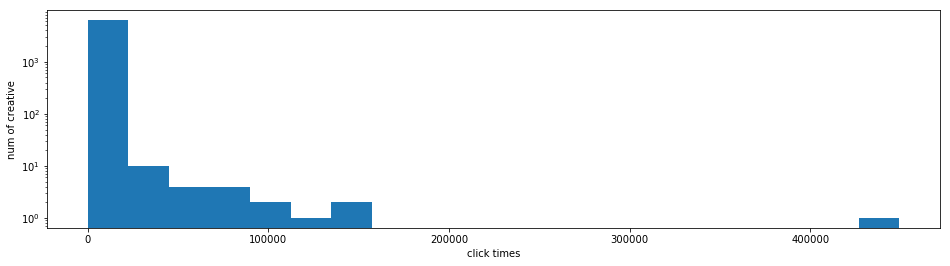

In [22]:
distribution_creativeID.plot(kind='hist', figsize=(16,4), logy=True, bins=20)
plt.xlabel('click times')
plt.ylabel('num of creative')
plt.show()

### userID

In [5]:
distribution_userID = train_df['userID'].value_counts()
distribution_userID.head()

1884671    113
865369     101
2177410     98
674047      86
2453862     79
Name: userID, dtype: int64

In [8]:
distribution_userID.value_counts().head()

1    2003625
2     359691
3     119755
4      47493
5      23931
Name: userID, dtype: int64

可见，只有一次点击行为的用户有很多。接下来，来看看，只有一次点击行为的用户里，成功转化的有多少。

In [12]:
userID_once_click_set = set(distribution_userID.loc[distribution_userID == 1].index.values)
indexer = train_df['userID'].isin(userID_once_click_set) & train_df['label'] == 1

In [13]:
train_df.loc[indexer].head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
147,1,170001,181031.0,2137,703736,2579,1,1
149,1,170001,170009.0,3981,2030308,2579,2,1
190,1,170001,170010.0,3584,936876,3322,2,3
194,1,170001,181027.0,2137,2619571,2579,1,2
344,1,170002,181025.0,1887,872565,5188,1,1


In [14]:
train_df.loc[indexer].index.size

64273

In [26]:
distribution_userID.index.size

2595627

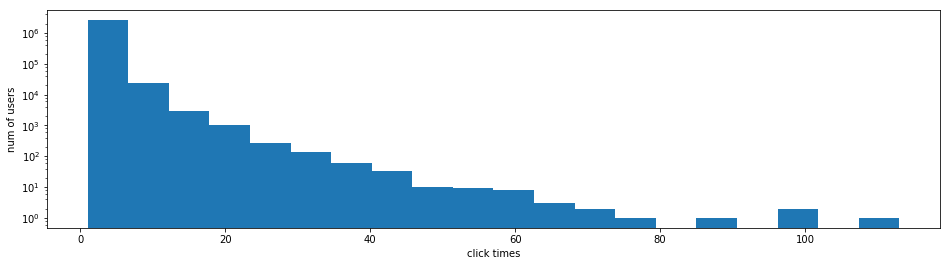

In [27]:
distribution_userID.plot(kind='hist',figsize=(16,4), logy=True, bins=20)
plt.xlabel('click times')
plt.ylabel('num of users')
plt.show()

#### 统计每一个用户的点击次数和转化次数

In [60]:
click_count = DataFrame(train_df['userID'].value_counts())
click_count.reset_index(inplace=True)
click_count.columns = ['userID', 'click_count']
click_count.head()

,userID,click_count
0,1884671,113
1,865369,101
2,2177410,98
3,674047,86
4,2453862,79


In [61]:
conversion_count = DataFrame(positive['userID'].value_counts())
conversion_count.reset_index(inplace=True)
conversion_count.columns = ['userID', 'conversion_count']
conversion_count.head()

,userID,conversion_count
0,2676800,11
1,1511544,7
2,979819,6
3,201873,6
4,1027751,6


In [62]:
user_count = click_count.merge(conversion_count, how='left', on='userID')
user_count.head()

,userID,click_count,conversion_count
0,1884671,113,NaN
1,865369,101,NaN
2,2177410,98,NaN
3,674047,86,NaN
4,2453862,79,NaN


In [64]:
user_count['conversion_count'].fillna(0, inplace=True)
user_count.head()

,userID,click_count,conversion_count
0,1884671,113,0.0
1,865369,101,0.0
2,2177410,98,0.0
3,674047,86,0.0
4,2453862,79,0.0


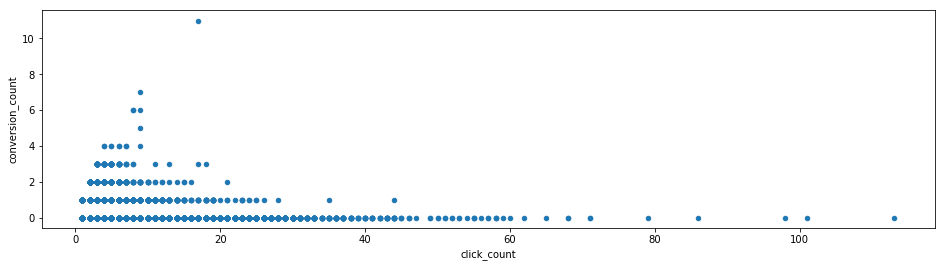

In [67]:
user_count.plot(x='click_count', y='conversion_count', kind='scatter', figsize=(16,4))
plt.show()

统计规律：   
1. 点击次数在45以上的用户，就从来没有转化过
2. 点击次数在28以上的用户，就很少有转化
3. 几乎每一个点击次数下，都有用户没有转化行为，所以并不能依据点击次数这个特征来判断prob。

思考：是把点击次数在45以上作为一个特征呢，还是把这部分样本直接删掉？这个目前还无法确定，先去看一下test中用户点击次数的分布。
观点：这些都是真实的数据，故，只要不是异常样本，就不要轻易舍弃。

还有一个问题，如图所示，`train`中的`userID`并不完全包含`test`中的，故据此提取出的与`userID`相关的特征，在`test`中有一部分`userID`没有。
![](http://i2.muimg.com/593974/dc5f9f2de7f9e16e.png)

In [68]:
user_count.index.size

2595627

#### 统计每一个用户的点击转化率

In [69]:
user_count['ratio'] = user_count['conversion_count'] / user_count['click_count']
distribution_user_click_conversion_ratio = user_count['ratio'].value_counts()

In [71]:
distribution_user_click_conversion_ratio.sort_index(inplace=True)

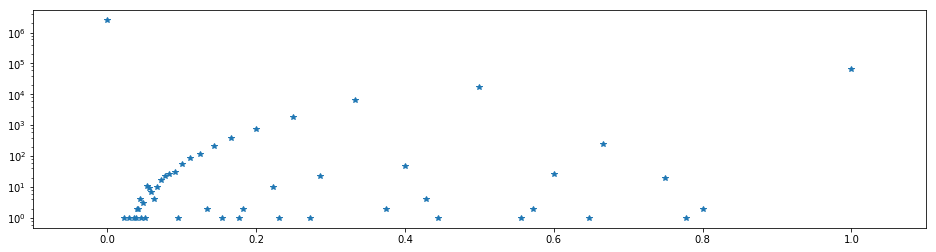

In [75]:
distribution_user_click_conversion_ratio.plot(figsize=(16,4), style='*', logy=True)
plt.xlim([-0.1, 1.1])
plt.show()

### positionID

In [28]:
distribution_positionID = train_df['positionID'].value_counts().sort_index()
distribution_positionID.head()

1      2
2     12
3    143
5     16
6     13
Name: positionID, dtype: int64

In [29]:
distribution_positionID.index.size

7219

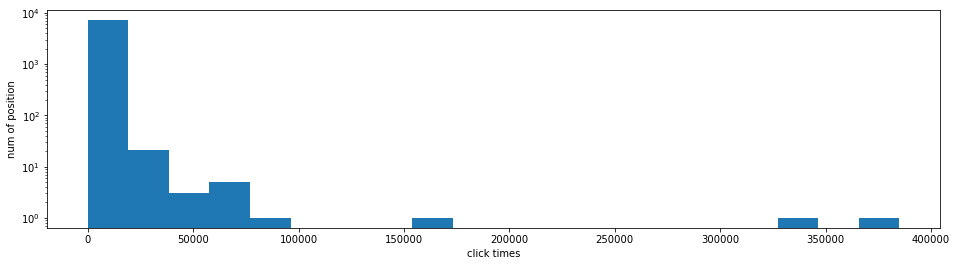

In [30]:
distribution_positionID.plot(kind='hist',figsize=(16,4), logy=True, bins=20)
plt.xlabel('click times')
plt.ylabel('num of position')
plt.show()

### connectionType
2G，3G，4G，WIFI，未知

In [4]:
train_df['connectionType'].value_counts().sort_index()

0      54586
1    3002059
2     539904
3     109648
4      43331
Name: connectionType, dtype: int64

In [45]:
train_df['userID'].value_counts().head()

1884671    113
865369     101
2177410     98
674047      86
2453862     79
Name: userID, dtype: int64

## telecomsOperator
中国移动，中国联通，中国电信，未知

In [89]:
train_df['telecomsOperator'].value_counts().sort_index()

0     100543
1    2080156
2     765356
3     803473
Name: telecomsOperator, dtype: int64

In [33]:
distribution_telecomsOperator_positive = train_df.loc[train_df['label'] == 1, 'telecomsOperator'].value_counts(dropna=False)
distribution_telecomsOperator_positive.sort_index(inplace=True)
distribution_telecomsOperator_positive

 1.0    45467
 2.0    24165
 3.0    20578
NaN      3052
Name: telecomsOperator, dtype: int64

In [34]:
distribution_telecomsOperator = train_df['telecomsOperator'].value_counts(dropna=False)
distribution_telecomsOperator.sort_index(inplace=True)
distribution_telecomsOperator

 1.0    2083533
 2.0     768244
 3.0     805547
NaN       92204
Name: telecomsOperator, dtype: int64

In [81]:
distribution_telecomsOperator_ratio = distribution_telecomsOperator_positive / distribution_telecomsOperator
distribution_telecomsOperator_ratio

0    0.032215
1    0.021811
2    0.031506
3    0.025564
Name: telecomsOperator, dtype: float64

不同运营商的正样数差不了太多，但是转化率却相差较大，可以把这个转化率特征加入模型中去

In [82]:
# 归一化看看
mx = distribution_telecomsOperator_ratio.max()
mn = distribution_telecomsOperator_ratio.min()
distribution_telecomsOperator_ratio = (distribution_telecomsOperator_ratio - mn) / (mx - mn)
distribution_telecomsOperator_ratio

0    1.000000
1    0.000000
2    0.931809
3    0.360734
Name: telecomsOperator, dtype: float64

可以看出，归一化后的差别还是挺大的

#### 固定某一个用户来看看

In [45]:
train_df['userID'].value_counts().head()

1884671    113
865369     101
2177410     98
674047      86
2453862     79
Name: userID, dtype: int64

In [37]:
train_df.loc[train_df['userID'] == 463234]

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
1,0,170000,NaN,1259,463234,6161,1,2
2085421,0,251337,NaN,3307,463234,6161,1,2
2247764,0,260055,NaN,784,463234,6161,1,0


由此可见，可以据此把部分缺失值补上。即把为0的值填充为具体的值。这样也不会扰乱，用户中途更换运营商的情况。

#### 填充缺失值
1. 以 userID, telecomsOperator 来 group, as_index=False。注意copy
2. 对 userID value_counts()
3. 找出 count > 1 的 userID
4. 对这部分userID进行填充

In [4]:
import gc

In [5]:
userID_telecomsOperator = \
    train_df.groupby(['userID', 'telecomsOperator'], as_index=False).count()[['userID', 'telecomsOperator']]
gc.collect()
userID_telecomsOperator.head()

,userID,telecomsOperator
0,1,1
1,2,2
2,4,2
3,5,1
4,5,2


In [6]:
userID_count_telecomsOperator = userID_telecomsOperator['userID'].value_counts(dropna=False)
userID_count_telecomsOperator.head()

6096       4
786761     4
1271120    4
1559142    4
1793501    4
Name: userID, dtype: int64

In [7]:
userID_count_telecomsOperator.value_counts()

1    2542737
2      51601
3       1261
4         28
Name: userID, dtype: int64

这应该理解为用户换号呢，还是异常值呢？应该是换号而且是换了运营商   
先处理为2的那部分吧

In [8]:
userID_count_set_2 = set(userID_count_telecomsOperator.loc[userID_count_telecomsOperator == 2].index.values)
userID_count_set_3 = set(userID_count_telecomsOperator.loc[userID_count_telecomsOperator == 3].index.values)
userID_count_set_4 = set(userID_count_telecomsOperator.loc[userID_count_telecomsOperator == 4].index.values)

In [9]:
userID_missing_value_set = set(train_df.loc[train_df['telecomsOperator'] == 0, 'userID'])

In [10]:
train_df.loc[train_df['telecomsOperator'] == 0, 'telecomsOperator'] = np.nan

还是得分情况考虑，不然有的是ffill,有的是bfill

#### userID_count_set_2

当处于连着WiFi时，telecomsOperator是什么就不重要了，所以要在填充telecomsOperator的缺失值时，只对那些未连接WiFi的样本进行填充。1代表连接了WiFi

In [11]:
train_df.sort_values(by=['userID', 'telecomsOperator'], inplace=True)

In [12]:
indexer = train_df['userID'].isin(userID_count_set_2 & userID_missing_value_set)

In [13]:
train_df.loc[indexer].head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
288206,0,172326,NaN,3944,158,3322,2,1.0
2721316,0,271720,NaN,3296,158,675,1,NaN
1079141,0,220035,NaN,4503,169,3322,1,3.0
3107239,0,282325,NaN,1069,169,3322,1,NaN
996191,0,212000,NaN,3126,652,675,1,2.0


In [14]:
train_df.loc[indexer & train_df['telecomsOperator'].isnull()].index.size

8339

In [15]:
train_df['telecomsOperator'].value_counts(dropna=False)

 1.0    2080156
 3.0     803473
 2.0     765356
NaN      100543
Name: telecomsOperator, dtype: int64

In [16]:
train_df.loc[indexer, 'telecomsOperator'] = train_df.loc[indexer, 'telecomsOperator'].ffill()

In [17]:
train_df['telecomsOperator'].value_counts(dropna=False)

 1.0    2083533
 3.0     805547
 2.0     768244
NaN       92204
Name: telecomsOperator, dtype: int64

#### userID_count_set_3

In [18]:
indexer = train_df['userID'].isin(userID_count_set_3 & userID_missing_value_set)

In [20]:
train_df.sort_values(by=['userID', 'clickTime'], inplace=True)

In [22]:
train_df.loc[indexer].head(10)

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
183008,0,171707,NaN,4511,1703,3322,2,1.0
1506758,0,231216,NaN,1128,1703,3322,1,NaN
1771155,0,241126,NaN,1971,1703,3322,1,NaN
3278364,0,291659,NaN,1918,1703,3322,1,3.0
393039,0,181309,NaN,2173,14152,3056,1,NaN
422393,0,181707,NaN,5155,14152,4753,1,3.0
424988,0,181738,NaN,4753,14152,1322,1,3.0
472669,0,190819,NaN,2556,14152,1322,1,3.0
487524,0,191043,NaN,2622,14152,1322,1,3.0
2870821,0,280748,NaN,3522,14152,1322,1,2.0


In [25]:
userID_tmp_set = \
    set(train_df.loc[indexer & train_df['telecomsOperator'].isnull() & (train_df['connectionType'] != 1), 'userID'])

In [26]:
len(userID_tmp_set)

38

In [29]:
train_df.loc[train_df['userID'].isin(userID_tmp_set)].head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
2963341,0,281432,NaN,4565,122657,388,1,1.0
3459920,0,300841,NaN,1486,122657,720,0,2.0
3470693,0,300926,NaN,1486,122657,720,0,NaN
524573,0,191649,NaN,1952,221024,3322,1,3.0
898408,0,211343,NaN,4689,221024,3322,2,NaN


实在不好填充，userID_count_set_3 和 userID_count_set_4 的缺失值就让它们缺着吧